#Carga inicial de datos



In [1]:
path_databaseWave7 = 'https://media.githubusercontent.com/media/giovy79/MCDA_TesisGrado/main/Data/WVS_Cross-National_Wave_7_csv_v5_0.csv'

In [2]:
import pandas as pd

dataOriginal = pd.read_csv(path_databaseWave7)
dataOriginal.shape

<ipython-input-2-818d27a44501>:3: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  dataOriginal = pd.read_csv(path_databaseWave7)


(94278, 606)

# Selección de preguntas para el modelo SEM

##Unificar preguntas para el estudio

In [ ]:
#Preguntas finales para el estudio
dfWVSPreguntasEstudio = dataOriginal[[
    #social values, attitudes & stereotypes
    'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q12', 'Q16', 'Q17', 'Q18', 'Q22','Q25', 'Q27', 'Q28', 'Q29', 'Q32', 'Q34', 'Q35', 'Q37', 'Q38', 'Q39',
    'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45',
    #social values, attitudes & stereotypes
    'Q46', 'Q47', 'Q48', 'Q49', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56',
    #social capital, trust and organizational membership
    'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q70', 'Q71', 'Q73', 'Q74', 'Q75', 'Q77', 'Q78', 'Q79',
    'Q80', 'Q81', 'Q90', 'Q94', 'Q95', 'Q96', 'Q97', 'Q98', 'Q99', 'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105',
    #economic values
    'Q106', 'Q107', 'Q108', 'Q109', 'Q110', 'Q111',
    #corruption
    'Q112', 'Q113', 'Q114', 'Q115', 'Q116', 'Q117', 'Q118', 'Q119', 'Q120',
    #migration
    'Q121', 'Q122', 'Q123', 'Q124', 'Q125', 'Q126', 'Q127', 'Q128', 'Q129', 'Q130',
    #security
    'Q131', 'Q132', 'Q133', 'Q134', 'Q135', 'Q136', 'Q137', 'Q138', 'Q139', 'Q140', 'Q142', 'Q143', 'Q144', 'Q145', 'Q146', 'Q150', 'Q151',
    #post-materialist index
    'Q152', 'Q153', 'Q154', 'Q155', 'Q156', 'Q157',
    #science & technology
    'Q158', 'Q160', 'Q161', 'Q162', 'Q163',
    #religious values
    'Q164', 'Q165', 'Q166', 'Q167', 'Q168', 'Q169', 'Q170', 'Q171', 'Q172', 'Q173', 'Q174', 'Q175',
    #ethical values & norms
    'Q176', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q182', 'Q183', 'Q184', 'Q185', 'Q186', 'Q187', 'Q188', 'Q189', 'Q190', 'Q191', 'Q192', 'Q195',
    'Q196', 'Q197', 'Q198',
    #political interest and political participation
    'Q199', 'Q200', 'Q201', 'Q202', 'Q203', 'Q204', 'Q205', 'Q207', 'Q208', 'Q209', 'Q210', 'Q211', 'Q212', 'Q213', 'Q214', 'Q215', 'Q216', 'Q217',
    'Q221', 'Q222', 'Q224', 'Q232', 'Q233', 'Q234',
    #political culture and political regimes
    'Q235', 'Q236', 'Q237', 'Q238', 'Q239', 'Q241', 'Q242', 'Q243', 'Q244', 'Q245', 'Q246', 'Q247', 'Q248', 'Q249', 'Q250', 'Q251', 'Q252', 'Q253',
    'Q254', 'Q255', 'Q256', 'Q257', 'Q258',
    #demography (31 items)
    'Q263', 'Q264', 'Q269', 'Q271', 'Q273', 'Q275', 'Q279', 'Q286', 'Q287', 'Q288'
    ]]
dfWVSPreguntasEstudio.shape

(94278, 215)

##Imputación por moda

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.DataFrame(dfWVSPreguntasEstudio)

# Paso 1: Reemplazar valores negativos por NaN
df[df < 0] = pd.NA

# Paso 2: Imputación de NaN con SimpleImputer utilizando la moda
imputer = SimpleImputer(strategy='most_frequent')
dfWVSPreguntasEstudio_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
dfWVSPreguntasEstudio_imputed.shape

(94278, 215)

##Preguntas que componen el modelo SEM

In [ ]:
#Preguntas para el modelo SEM1
dfWVSModeloSEM_imputedQ74 = dfWVSPreguntasEstudio_imputed[[
    #social values, attitudes & stereotypes
    'Q2','Q12','Q16','Q17','Q40','Q45',
    #social values, attitudes & stereotypes

    #social capital, trust and organizational membership
    'Q70','Q71', 'Q74',
    #economic values

    #corruption
    'Q118',
    #migration

    #security
    'Q132','Q134',
    #post-materialist index

    #science & technology

    #religious values
    'Q164','Q165','Q166','Q167','Q168','Q173','Q174',
    #ethical values & norms
    'Q177','Q178','Q179','Q180','Q181','Q195',
    #political interest and political participation

    #political culture and political regimes
    'Q253'
    #demography

    ]]

#Modelación SEM

In [ ]:
!pip install semopy
import semopy

In [ ]:
!pip install --upgrade semopy

In [ ]:
dataSEMQ74 = dfWVSModeloSEM_imputedQ74

In [ ]:
import pandas as pd
from semopy import Model, Optimizer, calc_stats

# Especificar las relaciones del modelo
model_spec = """
  # measurement model
    Corruption  =~  Q118
    Regulative  =~  Q45 + Q70  +  Q71  +  Q74  +  Q132 + Q134
    Normative   =~  Q40 + Q118 +  Q177 +  Q178 +  Q179 + Q180 + Q181 + Q195
    Cognitive   =~  Q2  + Q12  +  Q16  +  Q17  +  Q164 + Q165 + Q166 + Q167 + Q168 + Q173 + Q174 + Q253
  # regressions
    Corruption ~ Regulative + Normative + Cognitive
"""

# Instanciar el modelo
model = Model(model_spec)

# Ajustar el modelo
result = model.fit(dataSEMQ74)

# Mostrar resultados del modelo
estimates = model.inspect()
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Corruption,~,Regulative,7.565430,0.848189,8.919513,0.0
1,Corruption,~,Normative,1.021173,0.087359,11.689375,0.0
2,Corruption,~,Cognitive,0.651424,0.093205,6.989164,0.0
3,Q118,~,Corruption,1.000000,-,-,-
4,Q118,~,Normative,0.982992,0.085821,11.45397,0.0
...,...,...,...,...,...,...,...
58,Q40,~~,Q40,1.049124,0.004834,217.038223,0.0
59,Q45,~~,Q45,0.556633,0.002565,217.04611,0.0
60,Q70,~~,Q70,0.407855,0.002842,143.527608,0.0
61,Q71,~~,Q71,0.419768,0.003143,133.544248,0.0


In [ ]:
# Calcular y mostrar índices de ajuste
fit_indices = calc_stats(model)
fit_indices

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,292,325,123911.06786,0.0,640432.585051,0.806878,0.80652,0.784654,0.80652,0.785052,0.067011,115.371368,673.157554,1.314316


##Analisis de cargas factoriales

In [ ]:
import pandas as pd
from semopy import Model

# Especificar las relaciones del modelo
model_spec = """
  # measurement model
    Corruption  =~  Q118
    Regulative  =~  Q45 + Q70  +  Q71  +  Q74  +  Q132 + Q134
    Normative   =~  Q40 + Q118 +  Q177 +  Q178 +  Q179 + Q180 + Q181 + Q195
    Cognitive   =~  Q2  + Q12  +  Q16  +  Q17  +  Q164 + Q165 + Q166 + Q167 + Q168 + Q173 + Q174 + Q253
  # regressions
    Corruption ~ Regulative + Normative + Cognitive
"""

# Instanciar el modelo
model = Model(model_spec)

# Ajustar el modelo
# Supongamos que 'dataSEMQ74' es el DataFrame que contiene los datos
result = model.fit(dataSEMQ74)


In [ ]:
# Inspeccionar los parámetros del modelo
param_matrix = model.inspect()

# Verificar que `param_matrix` contiene las filas esperadas
print(param_matrix.head(20))

          lval op        rval   Estimate  Std. Err    z-value p-value
0   Corruption  ~  Regulative   7.565430  0.848189   8.919513     0.0
1   Corruption  ~   Normative   1.021173  0.087359  11.689375     0.0
2   Corruption  ~   Cognitive   0.651424  0.093205   6.989164     0.0
3         Q118  ~  Corruption   1.000000         -          -       -
4         Q118  ~   Normative   0.982992  0.085821   11.45397     0.0
5          Q45  ~  Regulative   1.000000         -          -       -
6          Q70  ~  Regulative  26.758942  2.967483   9.017387     0.0
7          Q71  ~  Regulative  28.929552  3.208081   9.017711     0.0
8          Q74  ~  Regulative  25.038202  2.776698   9.017257     0.0
9         Q132  ~  Regulative  -7.356911   0.82527  -8.914545     0.0
10        Q134  ~  Regulative  -5.434252  0.613209  -8.861983     0.0
11         Q40  ~   Normative   1.000000         -          -       -
12        Q177  ~   Normative  30.560598  2.440135  12.524145     0.0
13        Q178  ~   

In [ ]:
# Inspeccionar los parámetros del modelo
param_matrix = model.inspect()

# Definir las variables observadas para cada factor latente
latent_vars = {
    'Corruption': ['Q118'],
    'Regulative': ['Q45', 'Q70', 'Q71', 'Q74', 'Q132', 'Q134'],
    'Normative': ['Q40', 'Q118', 'Q177', 'Q178', 'Q179', 'Q180', 'Q181', 'Q195'],
    'Cognitive': ['Q2', 'Q12', 'Q16', 'Q17', 'Q164', 'Q165', 'Q166', 'Q167', 'Q168', 'Q173', 'Q174', 'Q253']
}

# Filtrar las cargas factoriales
filtered_loadings = []
for latent, observeds in latent_vars.items():
    for observed in observeds:
        match = param_matrix[(param_matrix['lval'] == observed) & (param_matrix['rval'] == latent)]
        if not match.empty:
            filtered_loadings.append(match.iloc[0])

# Convertir la lista de cargas factoriales a un DataFrame
loadings = pd.DataFrame(filtered_loadings)

# Convertir a un DataFrame pivotado
loadings_df = loadings.pivot(index='lval', columns='rval', values='Estimate')
loadings_df.columns.name = None
loadings_df.index.name = 'Variables Observadas'

# Verificar que las cargas factoriales han sido extraídas correctamente
print(loadings_df)

                      Cognitive  Corruption  Normative  Regulative
Variables Observadas                                              
Q118                        NaN         1.0   0.982992         NaN
Q12                    0.400436         NaN        NaN         NaN
Q132                        NaN         NaN        NaN   -7.356911
Q134                        NaN         NaN        NaN   -5.434252
Q16                    0.457738         NaN        NaN         NaN
Q164                  63.442282         NaN        NaN         NaN
Q165                  -8.052832         NaN        NaN         NaN
Q166                  -9.109934         NaN        NaN         NaN
Q167                 -10.562466         NaN        NaN         NaN
Q168                 -10.872634         NaN        NaN         NaN
Q17                   -2.371896         NaN        NaN         NaN
Q173                 -11.194782         NaN        NaN         NaN
Q174                  -0.633456         NaN        NaN        

<ipython-input-28-cd258f0e74e0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(valid_loadings.index, rotation=90)


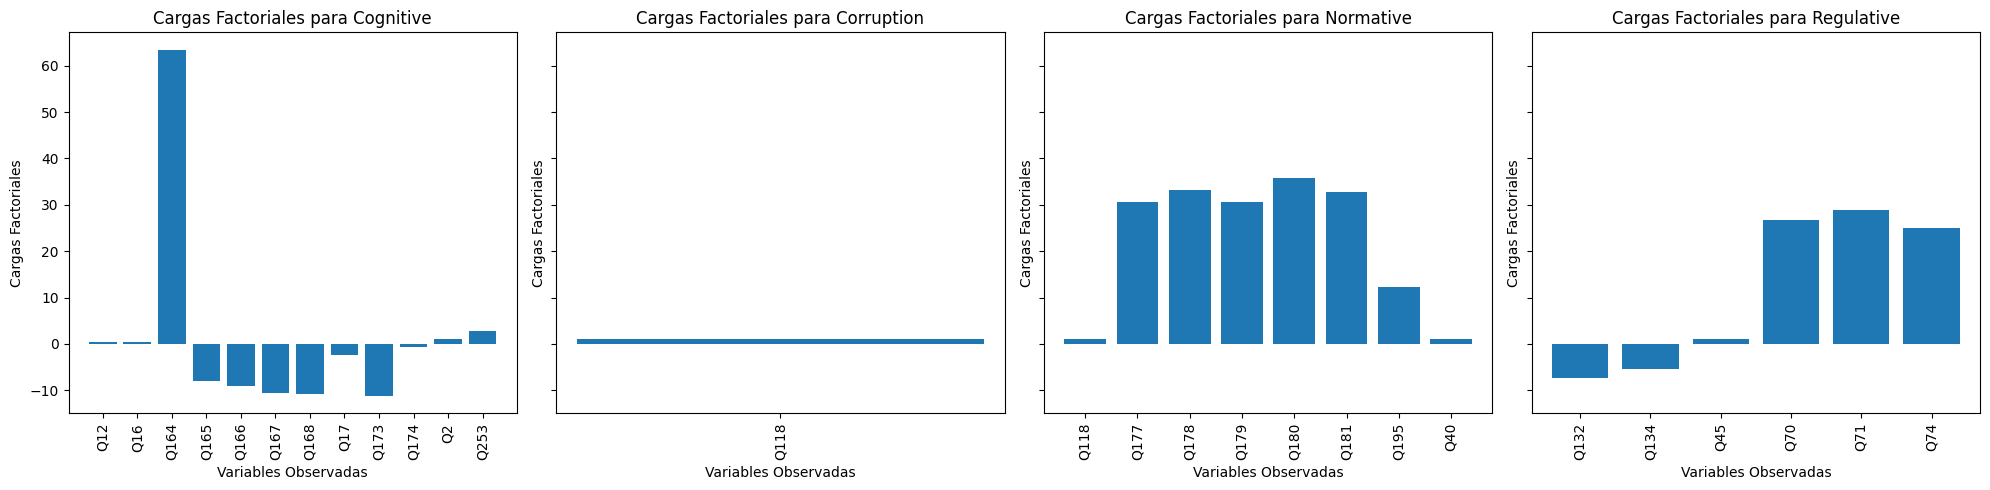

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar las cargas factoriales
def plot_factor_loadings(loadings_df):
    num_factors = loadings_df.shape[1]
    fig, axes = plt.subplots(1, num_factors, figsize=(5*num_factors, 5), sharey=True)

    for i, factor in enumerate(loadings_df.columns):
        # Filtrar valores no NaN para graficar
        valid_loadings = loadings_df[factor].dropna()
        axes[i].bar(valid_loadings.index, valid_loadings.values)
        axes[i].set_title(f'Cargas Factoriales para {factor}')
        axes[i].set_xticklabels(valid_loadings.index, rotation=90)
        axes[i].set_xlabel('Variables Observadas')
        axes[i].set_ylabel('Cargas Factoriales')

    plt.tight_layout()
    plt.show()

plot_factor_loadings(loadings_df)




### UMAP y Clusterización


In [ ]:

data_all_questions = dfWVSPreguntasEstudio_imputed.dropna()  # Eliminar filas con valores NaN
data_sem = dfWVSModeloSEM_imputedQ74.dropna()  # Eliminar filas con valores NaN


In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 982.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
import umap

# Configurar UMAP para ambas reducciones
umap_model_all = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_model_sem = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Ajustar y transformar los datos
umap_result_all = umap_model_all.fit_transform(data_all_questions)
umap_result_sem = umap_model_sem.fit_transform(data_sem)

# Convertir los resultados a DataFrames
umap_df_all = pd.DataFrame(umap_result_all, columns=['UMAP1', 'UMAP2'])
umap_df_sem = pd.DataFrame(umap_result_sem, columns=['UMAP1', 'UMAP2'])


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
from sklearn.cluster import KMeans

# Configurar K-Means
kmeans_all = KMeans(n_clusters=3, random_state=42,n_init=10)
kmeans_sem = KMeans(n_clusters=3, random_state=42,n_init=10)

# Ajustar y predecir los clusters
clusters_all = kmeans_all.fit_predict(umap_df_all)
clusters_sem = kmeans_sem.fit_predict(umap_df_sem)

# Añadir los clusters a los DataFrames de UMAP
umap_df_all['Cluster'] = clusters_all
umap_df_sem['Cluster'] = clusters_sem


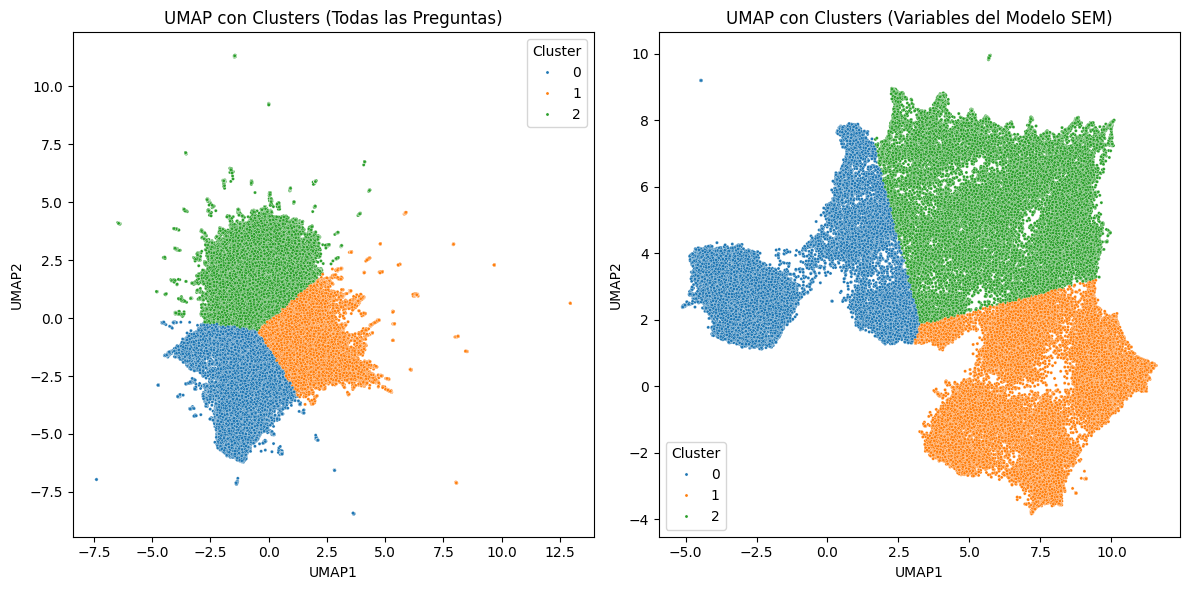

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una paleta de colores consistente con la visualización UMAP
palette = sns.color_palette("tab10", 3)

# Crear las gráficas utilizando seaborn.scatterplot
plt.figure(figsize=(12, 6))

# Subplot para todas las preguntas
plt.subplot(1, 2, 1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', palette=palette, data=umap_df_all, s=5)
plt.title('UMAP con Clusters (Todas las Preguntas)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Cluster')

# Subplot para las variables del modelo SEM
plt.subplot(1, 2, 2)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', palette=palette, data=umap_df_sem, s=5)
plt.title('UMAP con Clusters (Variables del Modelo SEM)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()



In [ ]:
umap_df_sem = pd.concat([umap_df_sem, data_sem.reset_index(drop=True)], axis=1)


In [ ]:
cluster_means = umap_df_sem.groupby('Cluster').mean()
print(cluster_means)


            UMAP1     UMAP2        Q2       Q12       Q16       Q17       Q40  \
Cluster                                                                         
0       -0.876075  3.385388  1.703729  1.365478  1.743006  1.613372  1.951018   
1        7.131855 -0.276014  1.626966  1.335272  1.695980  1.809596  2.391598   
2        5.857800  5.398072  1.784364  1.394260  1.728939  1.637927  2.168431   

              Q45       Q70       Q71  ...      Q168      Q173      Q174  \
Cluster                                ...                                 
0        1.418263  2.415597  2.623360  ...  1.105854  1.156222  1.682295   
1        1.733108  2.272919  2.567567  ...  1.558194  1.853535  1.750226   
2        1.513606  2.577739  2.772138  ...  1.209174  1.342809  1.740163   

             Q177      Q178      Q179      Q180      Q181      Q195      Q253  
Cluster                                                                        
0        1.928660  1.276153  1.148580  1.323748  1.25

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            UMAP1     UMAP2        Q2       Q12       Q16       Q17       Q40  \
Cluster                                                                         
0       -0.876075  3.385388  1.703729  1.365478  1.743006  1.613372  1.951018   
1        7.131855 -0.276014  1.626966  1.335272  1.695980  1.809596  2.391598   
2        5.857800  5.398072  1.784364  1.394260  1.728939  1.637927  2.168431   

              Q45       Q70       Q71  ...      Q168      Q173      Q174  \
Cluster                                ...                                 
0        1.418263  2.415597  2.623360  ...  1.105854  1.156222  1.682295   
1        1.733108  2.272919  2.567567  ...  1.558194  1.853535  1.750226   
2        1.513606  2.577739  2.772138  ...  1.209174  1.342809  1.740163   

             Q177      Q178      Q179      Q180      Q181      Q195      Q253  
Cluster                                                                        
0        1.928660  1.276153  1.148580  1.323748  1.25

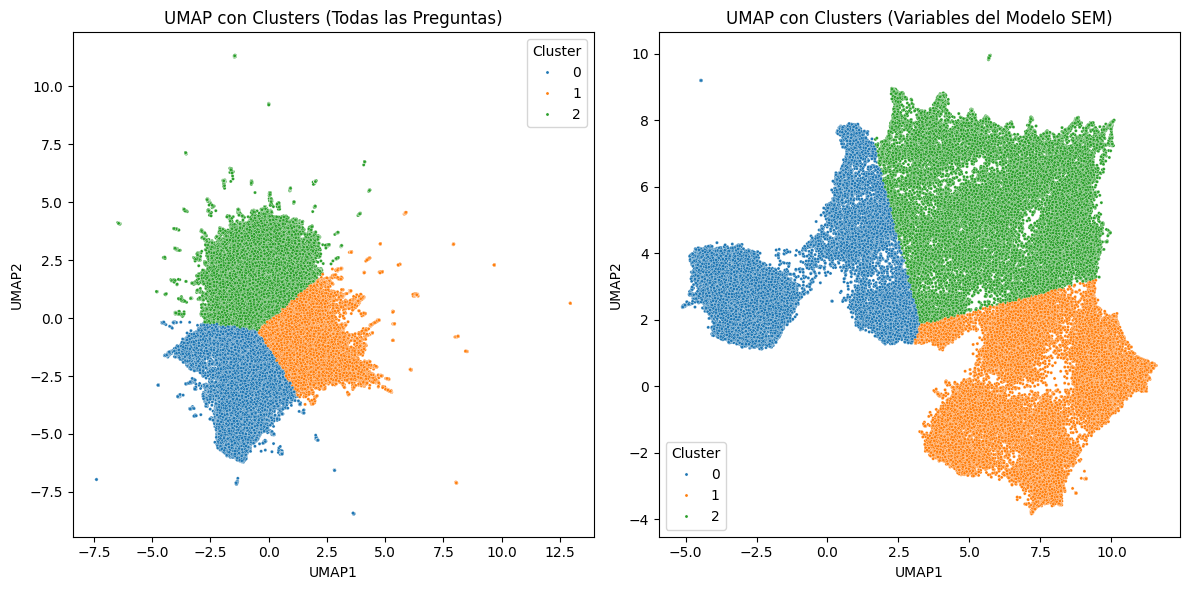

In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Preparar los datos
data_all_questions = dfWVSPreguntasEstudio_imputed.dropna()
data_sem = dfWVSModeloSEM_imputedQ74.dropna()

# UMAP
umap_model_all = umap.UMAP(n_components=2, random_state=42)
umap_model_sem = umap.UMAP(n_components=2, random_state=42)

umap_result_all = umap_model_all.fit_transform(data_all_questions)
umap_result_sem = umap_model_sem.fit_transform(data_sem)

umap_df_all = pd.DataFrame(umap_result_all, columns=['UMAP1', 'UMAP2'])
umap_df_sem = pd.DataFrame(umap_result_sem, columns=['UMAP1', 'UMAP2'])

# K-Means
kmeans_all = KMeans(n_clusters=3, random_state=42)
kmeans_sem = KMeans(n_clusters=3, random_state=42)

clusters_all = kmeans_all.fit_predict(umap_df_all)
clusters_sem = kmeans_sem.fit_predict(umap_df_sem)

umap_df_all['Cluster'] = clusters_all
umap_df_sem['Cluster'] = clusters_sem

# Añadir las variables seleccionadas al DataFrame UMAP
umap_df_sem = pd.concat([umap_df_sem, data_sem.reset_index(drop=True)], axis=1)

# Calcular las medias de las variables por cluster
cluster_means = umap_df_sem.groupby('Cluster').mean()
print(cluster_means)

# Graficar
palette = sns.color_palette("tab10", 3)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', palette=palette, data=umap_df_all, s=5)
plt.title('UMAP con Clusters (Todas las Preguntas)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Cluster')

plt.subplot(1, 2, 2)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', palette=palette, data=umap_df_sem, s=5)
plt.title('UMAP con Clusters (Variables del Modelo SEM)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()


###Caso especial de Q69

In [ ]:
#Preguntas para el modelo SEM1
dfWVSModeloSEM_imputedQ69 = dfWVSPreguntasEstudio_imputed[[
    #social values, attitudes & stereotypes
    'Q2','Q12','Q16','Q17','Q40','Q45',
    #social values, attitudes & stereotypes

    #social capital, trust and organizational membership
    'Q70','Q71', 'Q69',
    #economic values

    #corruption
    'Q118',
    #migration

    #security
    'Q132','Q134',
    #post-materialist index

    #science & technology

    #religious values
    'Q164','Q165','Q166','Q167','Q168','Q173','Q174',
    #ethical values & norms
    'Q177','Q178','Q179','Q180','Q181','Q195',
    #political interest and political participation

    #political culture and political regimes
    'Q253'
    #demography

    ]]

In [ ]:
dataSEMQ69 = dfWVSModeloSEM_imputedQ69

In [ ]:
import pandas as pd
from semopy import Model, Optimizer, calc_stats

# Especificar las relaciones del modelo
model_spec = """
  # measurement model
    Corruption  =~  Q118
    Regulative  =~  Q45 + Q70  +  Q71  +  Q69  +  Q132 + Q134
    Normative   =~  Q40 + Q118 +  Q177 +  Q178 +  Q179 + Q180 + Q181 + Q195
    Cognitive   =~  Q2  + Q12  +  Q16  +  Q17  +  Q164 + Q165 + Q166 + Q167 + Q168 + Q173 + Q174 + Q253
  # regressions
    Corruption ~ Regulative + Normative + Cognitive
"""

# Instanciar el modelo
model = Model(model_spec)

# Ajustar el modelo
result = model.fit(dataSEMQ69)

# Mostrar resultados del modelo
estimates = model.inspect()
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Corruption,~,Regulative,8.192897,0.887308,9.233433,0.0
1,Corruption,~,Normative,0.821161,0.063483,12.935219,0.0
2,Corruption,~,Cognitive,0.630840,0.083679,7.538844,0.0
3,Q118,~,Corruption,1.000000,-,-,-
4,Q118,~,Normative,0.782980,0.064295,12.177971,0.0
...,...,...,...,...,...,...,...
58,Q40,~~,Q40,1.048749,0.004833,217.017092,0.0
59,Q45,~~,Q45,0.555885,0.002561,217.058408,0.0
60,Q69,~~,Q69,0.365401,0.00272,134.35169,0.0
61,Q70,~~,Q70,0.266397,0.002824,94.329101,0.0
